K:capacity P0:intitial_value r:increase_rate t:time
[3.53025579e+05 9.16609190e-01 1.00000000e+00]


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


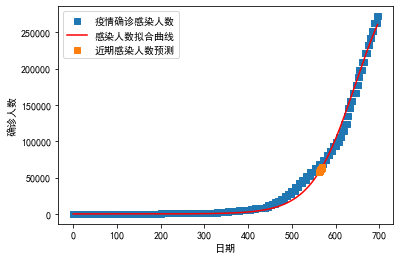

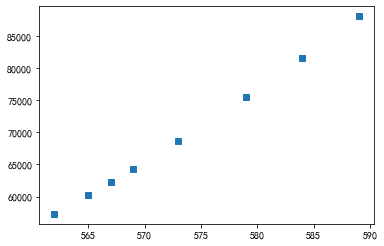

2月6日确诊人数预计:1人
2月7日确诊人数预计:1人
2月8日确诊人数预计:1人
2月9日确诊人数预计:1人
2月10日确诊人数预计:1人
2月11日确诊人数预计:1人
2月12日确诊人数预计:1人
2月13日确诊人数预计:1人
2月14日确诊人数预计:1人
2月15日确诊人数预计:1人
2月16日确诊人数预计:1人
2月17日确诊人数预计:1人
2月18日确诊人数预计:1人
2月19日确诊人数预计:1人
2月20日确诊人数预计:1人
2月21日确诊人数预计:1人
2月22日确诊人数预计:2人
2月23日确诊人数预计:2人
2月24日确诊人数预计:2人
2月25日确诊人数预计:2人
2月26日确诊人数预计:2人
2月27日确诊人数预计:2人
2月28日确诊人数预计:2人
2月29日确诊人数预计:2人
2月30日确诊人数预计:2人


In [7]:
#%matplotlib notebook

#引用约定
import pandas as pd
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']#解决中文乱码问题
from matplotlib import pyplot as plt
import random
import numpy as np
import matplotlib
import collections
from scipy.optimize import curve_fit
import math
#from matplotlib import pyplot as plt
data=pd.read_excel('C:\\Users\\dell\\Desktop\\东三省建模a\\cov数据\\主要国家\\俄罗斯.xls')
#print(data.head())
# x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

table = pd.pivot_table(data,index=['updateTime'],values=[u'province_confirmedCount',  u'province_suspectedCount',
                                                         u'province_curedCount', u'province_deadCount'])
# print(table)


# #fig = plt.figure(figsize = (40, 10))
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.xticks(rotation=45)
# ax.plot(table.index, table['province_confirmedCount'],linewidth = 1.0, color='red', zorder = 0)
# ax.plot(table.index, table['province_curedCount'], color = 'green', linewidth = 1.5, linestyle = '-', zorder = 7)
# ax.plot(table.index, table['province_deadCount'],color = 'black', linewidth = .5, zorder = 2)
# ax.scatter(table.index, table['province_suspectedCount'], color = 'blue', linewidth = 1.2, linestyle = '--', zorder = 3)
# plt.legend(labels = ['province_confirmedCount', 'province_curedCount', 'province_deadCount', 'province_suspectedCount']) 

# plt.show()

#######################################
#logistic模型
# a=0.10
# b=0.60
# eor=100


def logistic_increase_function(t, K, P0, r):
     r=0.02 #0.02
     t0 = 1
     exp_value = np.exp(r * (t - t0))
     return (K * exp_value * P0) / (K + (exp_value - 1) * P0)
     # 日期与感染人数
#t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
#t = table.index
a = []
for i in range(len(table.index)) :
    a.append(i)
t = np.array(a)
#print (t)
# t = np.array(t)
# P = data['confirm']
P = table['province_confirmedCount']
# print(P)
# 最小二乘拟合
P = np.array(P)
popt, pocv = curve_fit(logistic_increase_function, t, P)
'''test'''
# for i in range(len(P)):
#      print(P[i])
# print(type(P))
# print(type(P))
# print(popt)
# print(pocv)


#所获取的opt皆为拟合系数
print("K:capacity P0:intitial_value r:increase_rate t:time")
print(popt)
# df['popt'] = pd.to_datetime(df['popt'],format = '%Y-%m-%d %H:%M:%S')
# 拟合后对未来情况进行预测
P_predict=logistic_increase_function(t,popt[0],popt[1],popt[2])
future=[562,565,567,569,573,579,584,589]
future=np.array(future)
future_predict=logistic_increase_function(future,popt[0],popt[1],popt[2])
#近期情况
tomorrow=[562,563,564,565,566,567,568,569]
tomorrow=np.array(tomorrow)
tomorrow_predict=logistic_increase_function(tomorrow,popt[0],popt[1],popt[2])
#图像绘制
plot1=plt.plot(t,P,'s',label="疫情确诊感染人数")
plot2=plt.plot(t,P_predict,'r',label='感染人数拟合曲线')
plot3=plt.plot(tomorrow,tomorrow_predict,'s',label='近期感染人数预测')

plt.xlabel('日期')
plt.ylabel('确诊人数')
plt.legend(loc=0)
plt.show()
plot4=plt.plot(future,future_predict,'s',label='未来感染人数预测')
plt.show()
for i in range(25):
     people_sick=int(logistic_increase_function(np.array(i+25),popt[0],popt[1],popt[2]))
     print("2月%d日确诊人数预计:%d人"%(i+6,people_sick))



NameError: name 'I0' is not defined

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import scipy.stats as stats
from scipy.stats import poisson
# from scipy.stats import gamma
from scipy.stats import nbinom
from numpy import log as ln
import statsmodels.api as sm
from datetime import datetime, timedelta
import pylab as mpl

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置为黑体字

def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


gg = csv.writer(open('outPut_Rt_Data.csv', 'w'))

### data input from csv file, updated live from here
states = ['南非', '德国', '俄罗斯', '韩国', '美国', '日本', '巴西', '西班牙', '伊朗', '意大利', '印度', '中国',
         ]


infperiod = 4.5  # 病毒潜伏期的天数

'''test存储样本方差'''
test, test_2 = [], []

for state in states:
    from scipy.stats import \
        gamma  # 每次都需要导入gamma

    fig, ax = plt.subplots()

    #打开表格数据
    g = open('inPutData.csv', 'r')
    #reader = csv.reader(g)
    reader = csv.reader(g)

    confirmed = []
    dead = []
    recovered = []
    dates = []
    day = []

    ii = 0
    for row in reader:
        if (row[5] == state and ii > 0):
            date_object = datetime.strptime(row[0], '%Y/%m/%d').date()
            day.append(float(ii))
            # print(date_object,float(row[8]),float(row[7]),float(row[6]))
            dates.append(date_object)
            recovered.append(float(row[3]))
            dead.append(float(row[4]))
            confirmed.append(float(row[1]))
        ii += 1

    g.close()

    ndays = []
    for i in range(len(confirmed)):
        if (confirmed[i] > 0):
            ndays.append(day[i])
    print(state, 'days with cases=', len(ndays), 'total cases=', confirmed[-1])


    ##### 估计和预测
    dconfirmed = np.diff(confirmed)
    for ii in range(len(dconfirmed)):
        if dconfirmed[ii] < 0.: dconfirmed[ii] = 0.
    xd = dates[1:]

    plt.plot(xd, dconfirmed, 'go', alpha=0.5, markersize=8, label='每日新增病例')
    #5日平滑曲线
    sdays = 5
    yy = smooth(dconfirmed,
                sdays)  # 平滑sdays(天数)移动窗口，在连续的天报告中平均大块

    # lyyy=np.cumsum(lwy)
    TotalCases = np.cumsum(
        yy)  # 经过平滑处理后确认的情况:尝试了平滑的lowess，但从一个地方到另一个地方有更多的参数依赖。

    alpha = 3.  # gamma分布的形状参数
    beta = 2.  # 伽马分布的速率参数参见https://en.wikipedia.org/wiki/Gamma_distribution

    valpha = []
    vbeta = []

    pred = []
    pstdM = []
    pstdm = []
    xx = []
    NewCases = []

    predR = []
    pstRRM = []
    pstRRm = []

    anomalyday = []
    anomalypred = []

    for i in range(2, len(TotalCases)):
        new_cases = float(TotalCases[i] - TotalCases[i - 1])
        old_new_cases = float(TotalCases[i - 1] - TotalCases[i - 2])

        # 使用共轭先验作为b_t的伽马分布，参数为和
        alpha = alpha + new_cases
        beta = beta + old_new_cases
        valpha.append(alpha)
        vbeta.append(beta)

        mean = gamma.stats(a=alpha, scale=1 / beta, moments='m')

        RRest = 1. + infperiod * ln(mean)
        if (RRest < 0.): RRest = 0.
        predR.append(RRest)
        testRRM = 1. + infperiod * ln(gamma.ppf(0.99, a=alpha,
                                                scale=1. / beta))  # 新情况下99%置信区间的边界
        if (testRRM < 0.): testRRM = 0.
        pstRRM.append(testRRM)
        testRRm = 1. + infperiod * ln(gamma.ppf(0.01, a=alpha, scale=1. / beta))
        if (testRRm < 0.): testRRm = 0.
        pstRRm.append(testRRm)

        # print('estimate RR='，RRest,testRRm, testRRm) #查看Rt发展的数字

        if (new_cases == 0. or old_new_cases == 0.):
            pred.append(0.)
            pstdM.append(10.)
            pstdm.append(0.)
            NewCases.append(0.)

        if (new_cases > 0. and old_new_cases > 0.):
            NewCases.append(new_cases)

            # Using a Negative Binomial as the  Posterior Predictor of New Cases, given old one
            # 用负二项预测新发病例的后验证
            # 取参数r, p，作用于新的alpa，beta来自Gamma
            r, p = alpha, beta / (old_new_cases + beta)
            mean, var, skew, kurt = nbinom.stats(r, p, moments='mvsk')

            pred.append(mean)  # 新增病例的期望值
            testciM = nbinom.ppf(0.99, r, p)  # 新情况下99%置信区间的边界
            pstdM.append(testciM)
            testcim = nbinom.ppf(0.01, r, p)
            pstdm.append(testcim)

            np = p
            ###把方差存入test中
            test.append(np)

            nr = r
            flag = 0

            while (new_cases > testciM or new_cases < testcim):
                if (flag == 0):
                    anomalypred.append(new_cases)
                    anomalyday.append(dates[i + 1])  # 第一个新增情况是从 i = 2处开始

                # print("anomaly",testcim,new_cases,testciM,nr,np) #在99% CI之外的新病例
                #退火: 增加方差以包含异常观测:允许贝叶斯代码恢复
                # 均值: negbinomial=r*(1-p)/p  ; 方差: variance= r (1-p)/p**2
                # 保持均值，增加方差--> np=0.8*p (smaller), r= r (np/p)*( (1.-p)/(1.-np) )
                # 测试异常case

                nnp = 0.95 * np  # 使方差加倍，经过许多次贝叶斯步骤后，方差趋于很小
                nr = nr * (nnp / np) * ((1. - np) / (1. - nnp))  # 该分配保留了预期情况的平均值
                np = nnp

                ##退火后的方差值
                test_2.append(np)

                mean, var, skew, kurt = nbinom.stats(nr, np, moments='mvsk')
                testciM = nbinom.ppf(0.99, nr, np)
                testcim = nbinom.ppf(0.01, nr, np)

                flag = 1
            else:
                if (flag == 1):
                    alpha = nr  # 将用包含异常的新参数更新R分布
                    beta = np / (1. - np) * old_new_cases

                    testciM = nbinom.ppf(0.99, nr, np)
                    testcim = nbinom.ppf(0.01, nr, np)

                    # 退火使RR均值保持不变，但需要对其扩大后的CI进行调整
                    testRRM = 1. + infperiod * ln(gamma.ppf(0.99, a=alpha,
                                                            scale=1. / beta))  # 新情况下99%置信区间的边界
                    if (testRRM < 0.): testRRM = 0.
                    testRRm = 1. + infperiod * ln(gamma.ppf(0.01, a=alpha, scale=1. / beta))
                    if (testRRm < 0.): testRRm = 0.

                    pstRRM = pstRRM[:-1]  # 删除最后一个元素，用展开的CI替换RRest
                    pstRRm = pstRRm[:-1]
                    pstRRM.append(testRRM)
                    pstRRm.append(testRRm)

    print("方差 test :", test[len(test) - 1])
    print("退火后的方差 test_2: ", test_2[len(test_2) - 1])

    # 具有置信区间的R_t时间演化的可视化
    plt.clf()
    x = []
    for i in range(len(predR)):
        x.append(i)
    days = dates[3:]
    xd = days
    dstr = []
    for xdd in xd:
        dstr.append(xdd.strftime("%Y-%m-%d"))
    gg.writerow((state, dstr, predR))


###################

    # 新增病例的时间序列与与异常的实时预测
    plt.clf()
    fig, ax = plt.subplots()
    plt.title(state, fontsize=20)
    print(state, len(xd), len(pred))
    plt.fill_between(xd, pstdM, pstdm, color='gray', alpha=0.3, label="置信区间: 99%")
    plt.plot(xd, pred, 'c-', lw=4, alpha=0.8, label="预测每日新增病例")
    plt.plot(xd, pstdM, 'k-', alpha=0.4)
    plt.plot(xd, pstdm, 'k-', alpha=0.4)
    plt.plot(xd, NewCases, 'bo', ms=7, alpha=0.3, label="观察得到的新增病例")
    plt.plot(anomalyday, anomalypred, 'o', c='red', ms=3, label="异常显示")

    ## 对有控制和没有控制的未来进行预测
    import numpy as np  # 将在stats调用中获得一个类型异常

    date = []
    date.append(xd[-1])
    tt = xd[-1]

    pop = 1000000  # 人口规模
    ndays = 30#14  # 天数
    rintroductions = 1.  # 每天在人口中引入的传染病数量

    infperiod = 5.  # 5 days.
    gamma = 1. / infperiod
    m = 0.02  # 2%的死亡率
    DB = np.random.poisson(rintroductions,
                           ndays)  # 向量的引入，以后要从人口移动矩阵

    RR = np.ones(ndays)
    b = []
    for i in range(len(RR)):
        RR[i] = predR[-1]
        b.append(np.exp(gamma * (RR[i] - 1.)))

    print('Rt today=', RR[0])
    #print(b)
#''''''
    S = pop
    DeltaT = []
    DeltaT.append(NewCases[-1])  # 总用例，用第一个介绍初始化，如果有的话

    DeltaD = []
    DeltaD.append(0.)

    DeltaR = []
    DeltaR.append(0.)

    time = np.arange(ndays)

    D = 0
    R = 0
    I = 100

    Susceptibles = []
    Susceptibles.append(S)
    Infectious = []
    Infectious.append(I)
    Dead = []
    Dead.append(D)
    Recovered = []
    Recovered.append(R)

    KP = 0.05
    KI = 0.15
    KD = 0.0
    Dt = 1.
    integral = 0.
    u = 0
    error0 = RR[0]
    Rtarget = 0.8
    upp = []
    upp.append(pstdM[-1])
    lpp = []
    lpp.append(pstdm[-1])

    for i in range(1, ndays):
    #for i in range(1, 20):
        tt += timedelta(days=1)
        date.append(tt)

        RR[i] = RR[i] * float(S) / float(pop) - u
        b[i] = np.exp(gamma * (RR[i] - 1.))
        error = RR[i] - Rtarget

        integral = integral + error * Dt
        derivative = (error - error0) / Dt

        u = KP * error + KI * integral + KD * derivative
        error0 = error
        # print(RR[i],u,error)

        # rateT=(DB[i]+b[i]*(DeltaT[i-1] - DB[i])+ gamma*RR[i]*DB[i])
        rateT = b[i] * DeltaT[i - 1]
        Ncases = np.random.poisson(rateT, 1)[0]
        DeltaT.append(Ncases)
        upper = poisson.ppf(0.99, rateT, 1)
        lower = poisson.ppf(0.01, rateT, 1)
        upp.append(upper)
        lpp.append(lower)

    plt.show()
